## Библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [2]:
import torch
torch.cuda.current_device()

0

## №1

#### Определить два вектора, представляющие собой число автомобилей, припаркованных в течении 5 рабочих дней у бизнес-центра на уличной стоянке и в подземном гараже. ####

In [3]:
df = pd.DataFrame({'День': ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница'], 
                   'Улица': [80, 98, 75, 91, 78],
                   'Гараж': [100, 82, 105, 89, 102]})
df

,День,Улица,Гараж
0,Понедельник,80,100
1,Вторник,98,82
2,Среда,75,105
3,Четверг,91,89
4,Пятница,78,102


In [4]:
var1 = df['Улица'].to_numpy()
var2 = df['Гараж'].to_numpy()

## №1.1
#### Найти и интерпретировать корреляцию между переменными «Улица» и «Гараж» (подсчитать корреляцию по Пирсону). ####

In [5]:
np.corrcoef(var1, var2)[0,1]

-0.9999999999999998

In [6]:
corr, p_value = st.pearsonr(var1, var2)
print(corr)
print(p_value)

-1.0
0.0


Коэффициент корреляции практически равен –1, что указывает на полностью обратную линейную зависимость.

## №1.2
#### Построить диаграмму рассеяния для вышеупомянутых переменных. ####

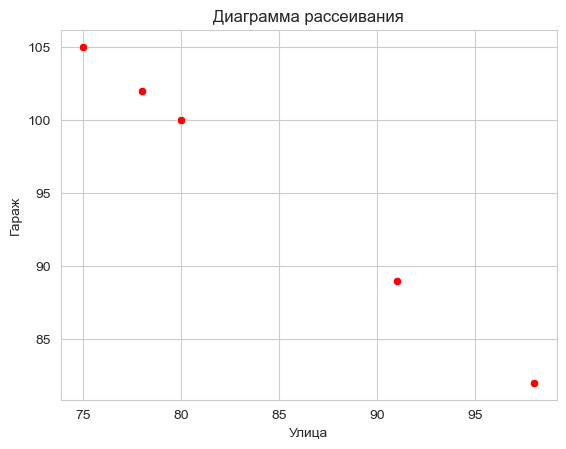

In [7]:
sns.scatterplot(x=var1, y=var2, color='r')
plt.grid(True)
plt.title('Диаграмма рассеивания')
plt.xlabel('Улица')
plt.ylabel('Гараж')

plt.show()

## №2

#### Найти и выгрузить данные. Вывести, провести предобработку и описать признаки. ####

Набор данных о рекламе отражает доходы от продаж, полученные в связи с расходами на рекламу по нескольким каналам, таким как радио, телевидение и газеты.
Признаки:
* TV - Затраты на ввод рекламы на телевидении.
* Radio - Затраты на ввод рекламы на радио.
* Newspaper - Затраты на ввод рекламы в газетах.
* Sales - Продажи рекламируемого товара. (target)

In [8]:
df2 = pd.read_csv("C:\\Users\Katy\Documents\Mirea\\7 сем\Бигдата\Practice 4_Regression\Advertising.csv")

In [9]:
df2.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [10]:
df2.duplicated().sum()

0

Датафрейм не имеет пропусков и дубликатов, далее посмотрим требуется ли стандартизация данных.

<Axes: xlabel='sales', ylabel='Count'>

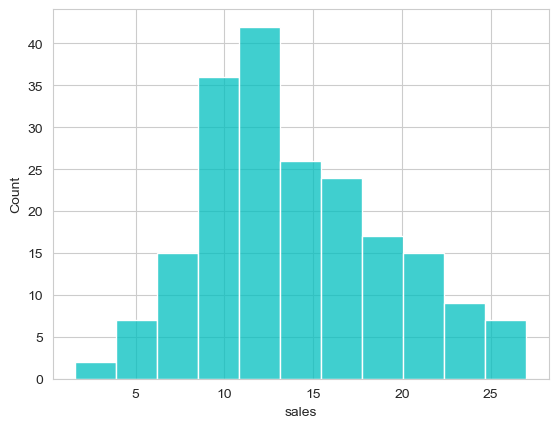

In [11]:
sns.histplot(df2['sales'], kde= False, color='c')

<Axes: xlabel='TV', ylabel='Count'>

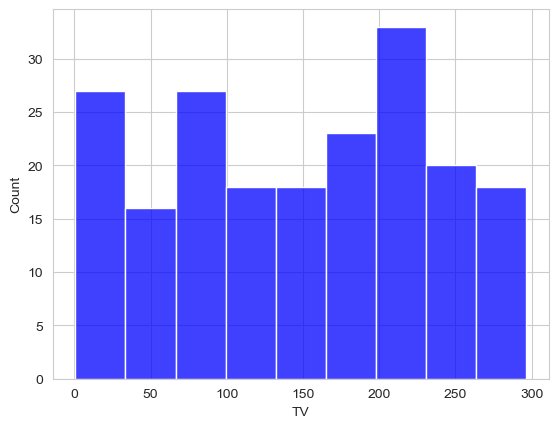

In [12]:
sns.histplot(df2['TV'], kde= False, color='b')

Стандартизируем данные.

In [13]:
scaler = preprocessing.StandardScaler()
col = df2.columns
result = scaler.fit_transform(df2)
df2 = pd.DataFrame(result, columns=col)
df2

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


## №2.1

#### Построить корреляционную матрицу по одной целевой переменной. Определить наиболее коррелирующую переменную, продолжить с ней работу в следующем пункте. ####

In [14]:
corr_matrix = df2.corr().sales.abs().to_frame()
corr_matrix 

,sales
TV,0.782224
radio,0.576223
newspaper,0.228299
sales,1.000000


<Axes: >

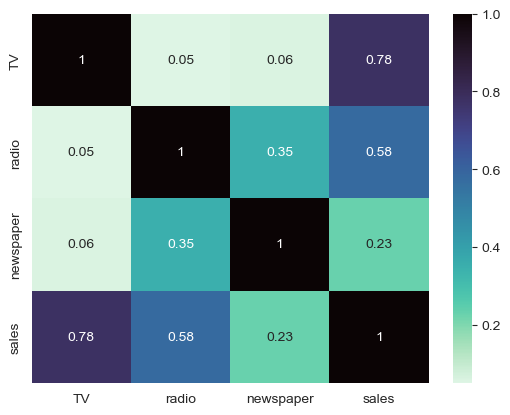

In [15]:
# plt.figure(figsize=(10, 6))
sns.heatmap(round(df2.corr(),2).abs(), annot = True, cmap= 'mako_r')

Наиболее коррелируемая переменная - TV.

## №2.2

#### Реализовать регрессию вручную, отобразить наклон, сдвиг и MSE. ####

In [16]:
X = df2[['TV']]
y = df2['sales']

X = np.array(X,type(float))
y = np.array(y,type(float))

Линейная регрессия с помощью библиотеки sklearn.

In [17]:
model = LinearRegression()
model.fit(X,y)
model.coef_, model.intercept_

(array([0.78222442]), -2.6428269210263167e-16)

In [18]:
model_y_sklearn = model.coef_[0] * X + model.intercept_
mse_sklearn = mean_squared_error(model_y_sklearn, y)

Линейная регрессия вручную.

In [19]:
def mse(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    return np.sum((y - y_pred) ** 2) / len(y_pred)

def grad(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    return np.array([2/len(X) * np.sum((y - y_pred)) * (-1),
                     2/len(X) * np.sum((y - y_pred) * (-X[:, 0]))])

In [20]:
eps = 0.0001
lr = 0.001

w1 = 0
w0 = 0

next_w1 = w1
next_w0 = w0

n = 100000
for i in range(n):
    cur_w1 = next_w1
    cur_w0 = next_w0
    
    next_w0 = cur_w0 - lr * grad(X, cur_w1, cur_w0, y)[0]
    next_w1 = cur_w1 - lr * grad(X, cur_w1, cur_w0, y)[1]
    
    # print(f"Итерация: {i}")
    # print(f"Текущая точка: {cur_w1, cur_w0} | Следующая точка: {next_w1, next_w0}")
    # print(f"MSE: {mse(X, cur_w1, cur_w0, y)}")
    mse_our_model = mse(X, cur_w1, cur_w0, y)
    # print("_______________________________________________________")
    
    if (abs(cur_w1 - next_w1) <= eps) and (abs(cur_w0 - next_w0) <= eps):
        break

## №2.3

#### Визуализировать регрессию на графике. ####

C:\Users\Katy\AppData\Local\Temp\ipykernel_31076\1226958073.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--g" (-> color='g'). The keyword argument will take precedence.
  plt.plot(X, our_model_y, '--g', linewidth = 2, color = 'y', label = f'Вручную = {next_w1:.2f}x + {next_w0:.2f}, MSE: {round(mse_our_model, 2)}')


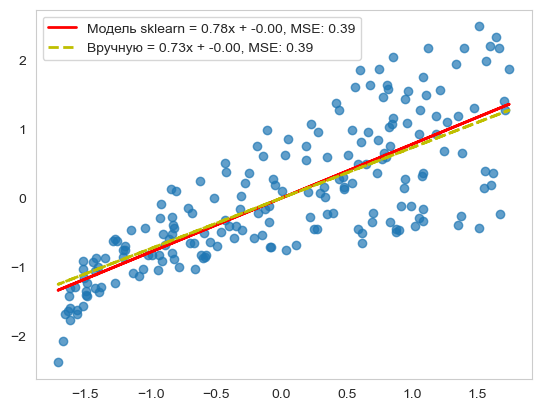

In [21]:
our_model_y = next_w1 * X + next_w0

plt.plot(X, model_y_sklearn, linewidth = 2, color = 'r', label = f'Модель sklearn = {model.coef_[0]:.2f}x + {model.intercept_:.2f}, MSE: {round(mse_sklearn, 2)}')
plt.plot(X, our_model_y, '--g', linewidth = 2, color = 'y', label = f'Вручную = {next_w1:.2f}x + {next_w0:.2f}, MSE: {round(mse_our_model, 2)}')
plt.scatter(X, y, alpha=0.7)
plt.grid()
plt.legend()

## №3

#### Загрузить данные: 'insurance.csv'. Вывести и провести предобработку. Вывести список уникальных регионов. ####

In [23]:
df3 = pd.read_csv("C:\\Users\Katy\Documents\Mirea\\7 сем\Бигдата\Practice 4_Regression\insurance.csv")
df3

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [24]:
df3.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [25]:
df2.duplicated().sum()

0

Список уникальных регионов.

In [26]:
df3['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## №3.1

#### Выполнить однофакторный ANOVA тест, чтобы проверить влияние региона на индекс массы тела (BMI), используя первый способ, через библиотеку Scipy. ####

In [27]:
df3_anova = df3[['region', 'bmi']]
groups = df3_anova.groupby('region').groups

southwest = groups['southwest']
southeast = groups['southeast']
northwest = groups['northwest']
northeast = groups['northeast']

In [28]:
st.f_oneway(southeast, southwest, northeast, northwest)

F_onewayResult(statistic=0.346714661845191, pvalue=0.7915433732308843)

p-value > 0.05, следовательно, регион не оказывает статистически значимое влияние на bmi.

## №3.2

#### Выполнить однофакторный ANOVA тест, чтобы проверить влияние региона на индекс массы тела (BMI), используя второй способ, с помощью функции anova_lm() из библиотеки statsmodels. ####

In [29]:
anova_model = ols('bmi ~ region', data = df3).fit()
anova_result = sm.stats.anova_lm(anova_model, typ = 2)
anova_result

,sum_sq,df,F,PR(>F)
region,4055.880631,3.0,39.495057,1.881839e-24
Residual,45664.319755,1334.0,NaN,NaN


p-value < 0.05.

## №3.3

#### С помощью t критерия Стьюдента перебрать все пары. Определить поправку Бонферрони. Сделать выводы. ####

In [30]:
regions = ['southwest', 'southeast', 'northwest', 'northeast']
region_pair = []

from itertools import combinations
from scipy.stats import ttest_ind

for region1, region2 in combinations(regions, 2):

    group1 = df3[df3['region'] == region1]['bmi']
    group2 = df3[df3['region'] == region2]['bmi']

    t_stat, p_value = ttest_ind(group1, group2)
    region_pair.append(
        {
            'Region 1': region1,
            'Region 2': region2,
            'T-Statistic': t_stat,
            'P-Value': p_value
        }
    )

results_df = pd.DataFrame(region_pair)

alpha = 0.05
results_df['P-Value (Bonferroni Corrected)'] = results_df['P-Value'] * len(region_pair)

results_df['P-Value (Bonferroni Corrected)'] = results_df['P-Value (Bonferroni Corrected)'].apply(lambda x: "{:.10f}".format(x))
print(results_df)

    Region 1   Region 2  T-Statistic       P-Value  \
0  southwest  southeast    -5.908374  5.437401e-09   
1  southwest  northwest     3.284417  1.076958e-03   
2  southwest  northeast     3.116900  1.908616e-03   
3  southeast  northwest     9.256490  2.643571e-19   
4  southeast  northeast     8.790906  1.186015e-17   
5  northwest  northeast     0.060308  9.519292e-01   

  P-Value (Bonferroni Corrected)  
0                   0.0000000326  
1                   0.0064617510  
2                   0.0114516970  
3                   0.0000000000  
4                   0.0000000000  
5                   5.7115750249  


## №3.4

#### Выполнить пост-хок тесты Тьюки и построить график. ####

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,0.0263,0.9999,-1.1552,1.2078,False
northeast,southeast,4.1825,0.0,3.033,5.332,True
northeast,southwest,1.4231,0.0107,0.2416,2.6046,True
northwest,southeast,4.1562,0.0,3.0077,5.3047,True
northwest,southwest,1.3968,0.0127,0.2162,2.5774,True
southeast,southwest,-2.7594,0.0,-3.9079,-1.6108,True


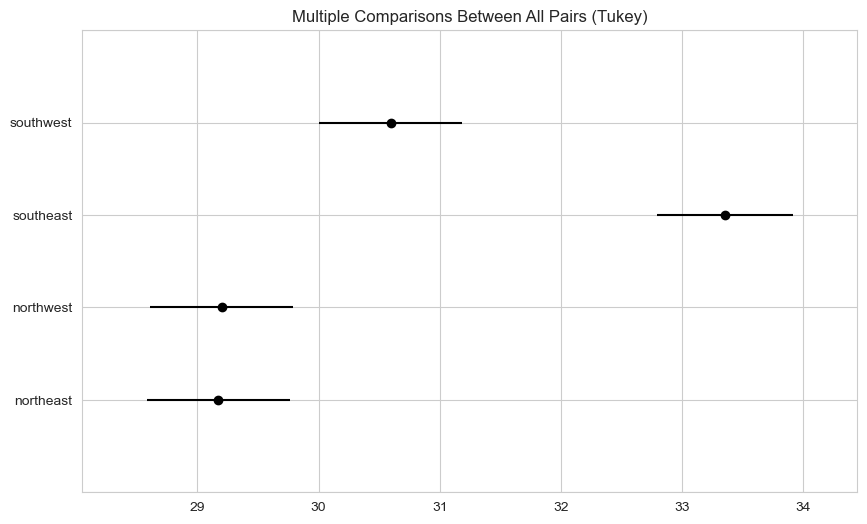

In [31]:
tukey = pairwise_tukeyhsd(endog=df3['bmi'].values, groups=df3['region'], alpha = 0.05)

tukey.plot_simultaneous()
plt.vlines(x = 49.57, ymin = -0.5, ymax = 4.5, color = "red")
tukey.summary()

## №3.5

#### Выполнить двухфакторный ANOVA тест, чтобы проверить влияние региона и пола на индекс массы тела (BMI), используя функцию anova_lm() из библиотеки statsmodels. ####

In [32]:
model = ols('bmi ~ C(region) * C(sex)', data=df3).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(region),4034.975135,3.0,39.398134,2.163195e-24
C(sex),86.007035,1.0,2.519359,1.126940e-01
C(region):C(sex),174.157808,3.0,1.700504,1.650655e-01
Residual,45404.154911,1330.0,NaN,NaN


## №3.6

#### Выполнить пост-хок тесты Тьюки и построить график. ####

In [34]:
# mc = MultiComparison(df3['bmi'], df3['region'])
# mc.tukeyhsd().plot_simultaneous()